In [9]:
import numpy as np
import matplotlib.pyplot as plt


atype, x, y, z = [], [], [], []

with open("/Users/ray/Downloads/newtest/endocytosis_time2/sample1/650") as f:
    for line in f:
        cols = line.split()
        if len(cols)==11:
            atype.append(int(cols[2]))
            x.append(float(cols[6]))
            y.append(float(cols[7]))
            z.append(float(cols[8]))
            

lx,ly,lz,npz=[],[],[],[] 

with open("/Users/ray/Downloads/newtest/endocytosis_time/sample1/log.lammps") as g:
    for line in g:
        cols = line.split()
        if len(cols)==17 and cols[0].isnumeric():
            lx.append(float(cols[5]))
            ly.append(float(cols[6]))
            lz.append(float(cols[7]))
            npz.append(float(cols[14]))
           

In [10]:
type1x,type1y,type1z,type2x,type2y,type2z,type3x,type3y,type3z,\
type4x,type4y,type4z,type5x,type5y,type5z=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]

for i in range(len(atype)):
    if atype[i]==1:
        type1x.append(x[i])
        type1y.append(y[i])
        type1z.append(z[i])
    if atype[i]==2:
        type2x.append(x[i])
        type2y.append(y[i])
        type2z.append(z[i])
    if atype[i]==3:
        type3x.append(x[i])
        type3y.append(y[i])
        type3z.append(z[i])
    if atype[i]==4:
        type4x.append(x[i])
        type4y.append(y[i])
        type4z.append(z[i])
    if atype[i]==5:
        type5x.append(x[i])
        type5y.append(y[i])
        type5z.append(z[i])             

In [11]:
import statistics as stat 
nptypex=type4x+type5x
nptypey=type4y+type5y
nptypez=type4z+type5z
npxmean=stat.mean(nptypex)
npymean=stat.mean(nptypey)
npzmean=stat.mean(nptypez)
print(npxmean,npymean,npzmean)

6.636426174496644 70.65337248322147 23.081355704697987


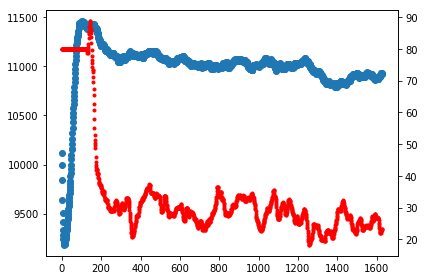

Ration of surface 0.02731286251214714


In [101]:
surface=[]
for i in range(len(lx)):
    surface.append(lx[i]*ly[i])

plt.figure(figsize=(15, 24))
fig, ax1 = plt.subplots()
ax1.plot(surface,'o')

ax2 = ax1.twinx()
ax2.plot(npz, 'r.')

fig.tight_layout()
plt.show()

surf1=stat.mean(surface[125:167])
surf2=stat.mean(surface[300:400])
print("Ration of surface",(surf1-surf2)/surf2)

In [12]:
import math
vesiclelx,vesiclely,vesiclelz=[],[],[]
for i in range(len(type2x)):
    distance=math.sqrt((type2x[i]-npxmean)**2+(type2y[i]-npymean)**2+(type2z[i]-npzmean)**2)
    if distance<=15:
        vesiclelx.append(type2x[i])
        vesiclely.append(type2y[i])
        vesiclelz.append(type2z[i])
        
vesiclenx,vesicleny,vesiclenz=[],[],[]
for i in range(len(type1x)):
    distance=math.sqrt((type1x[i]-npxmean)**2+(type1y[i]-npymean)**2+(type1z[i]-npzmean)**2)
    if distance<=15:
        vesiclenx.append(type1x[i])
        vesicleny.append(type1y[i])
        vesiclenz.append(type1z[i])

vesiclex=vesiclenx+vesiclelx
vesicley=vesicleny+vesiclely
vesiclez=vesiclenz+vesiclelz  

print("Number of Ligands:",len(vesiclelx))
print("Number of Normals:",len(vesiclenx))
print("Total Number of lipids on Vesicle:",len(vesiclex))
print("Ratio of Ligand:",len(vesiclelx)/len(vesiclex))
print("Ratio of lipid out:",len(vesiclelx)/len(type1x+type2x))

Number of Ligands: 643
Number of Normals: 584
Total Number of lipids on Vesicle: 1227
Ratio of Ligand: 0.5240423797881011
Ratio of lipid out: 0.03215


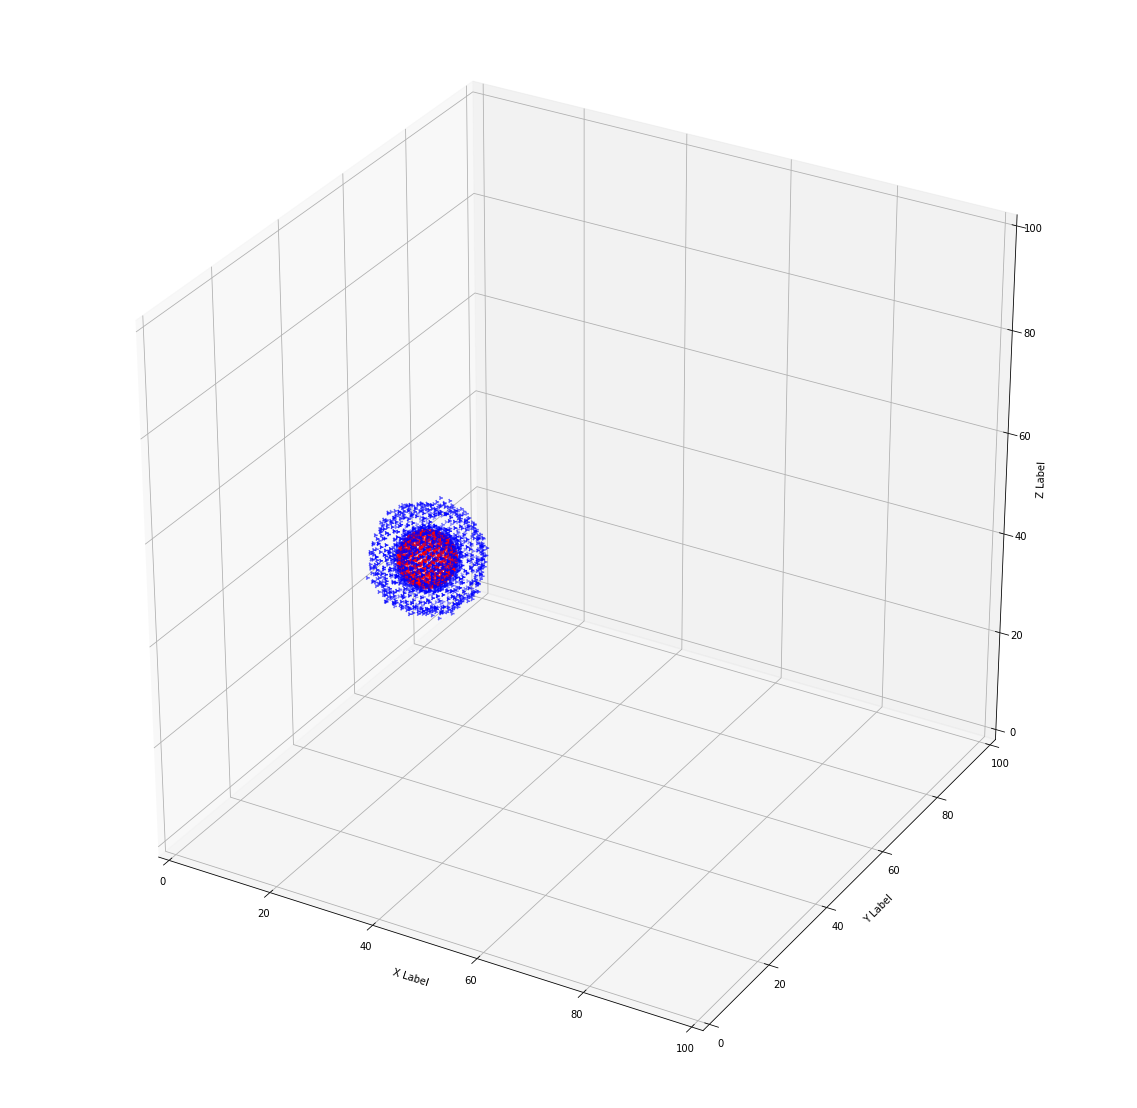

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nptypex, nptypey, nptypez,c='r', marker='o')
ax.scatter(vesiclex, vesicley, vesiclez,c='b', marker="4")

ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()